In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('ex1data1.txt',header=None)
df.columns = 'Population of City (*10k)','Profit in (*$10k)'
df

,Population of City (*10k),Profit in (*$10k)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


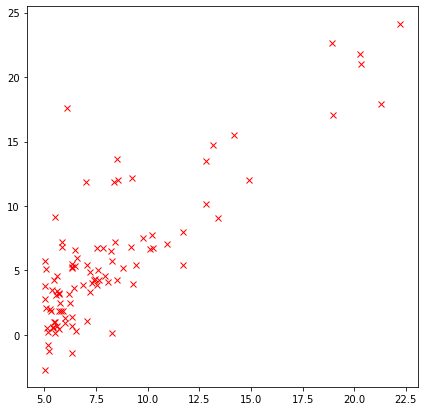

In [3]:
X = df.iloc[:,0].values
X = X.reshape(X.shape[0],1)
# print("X:" + str(X))
y = df.iloc[:,1].values
y = y.reshape(y.shape[0],1)
# print("y: "+ str(y))
fig = plt.figure(figsize=(7,7))
plt.plot(X,y,'xr')
plt.show()

In [4]:
def predict(X, theta):
    predicted_y = np.dot(X,theta)
    return predicted_y

In [5]:
def computecost(X, y, theta):
    m = X.shape[0]
    predicted_y=predict(X,theta)
    J = np.sum(pow((predicted_y-y),2))/(2*m)
    return J

In [6]:
def gradientdescent(X, y, theta, alpha, num_iter):
    m = X.shape[0]
    J_history = np.zeros((num_iter,1))
    
    for i in range(0,num_iter):
        prd_y = predict(X,theta)
        dJ = np.sum(((prd_y-y)*X),axis=0)/m
        dJ = dJ.reshape(dJ.shape[0],1)
        theta = theta - alpha*dJ
        J_history[i] = computecost(X,y,theta)
        
    return theta,J_history

In [7]:
X_mask = X
X_0 = np.ones((X_mask.shape[0],1))
X_mask = np.concatenate((X_0,X_mask),axis=1)

theta = np.zeros((X_mask.shape[1],1))
theta,J_history = gradientdescent(X_mask, y, theta, 0.01, 1500)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


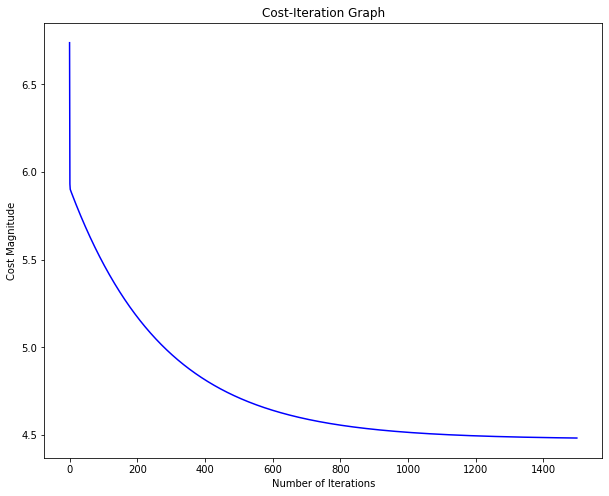

In [8]:
a = np.arange(0,len(J_history))
fig = plt.figure(figsize=(10,8))
plt.plot(a,J_history,'-b')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Magnitude')
plt.title("Cost-Iteration Graph")
plt.show()